---
title: Penguin Classification
author: "Deepika Agarwal"
format:
  html:
    embed-resources: true
echo: true
---


## Palmer Penguins Modeling

Import the Palmer Penguins dataset and print out the first few rows.

Suppose we want to predict `species` using the other variables in the dataset.

**Dummify** all variables that require this.

In [1]:
!pip install palmerpenguins

zsh:1: command not found: pip


In [2]:
import numpy as np
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from palmerpenguins import load_penguins
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures, label_binarize
from sklearn.compose import make_column_selector, ColumnTransformer
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score, roc_curve
from plotnine import ggplot, aes, geom_line, geom_abline, labs, theme_minimal, ggtitle

In [3]:
penguins = load_penguins()

In [4]:
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


In [5]:
penguins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
 7   year               344 non-null    int64  
dtypes: float64(4), int64(1), object(3)
memory usage: 21.6+ KB


In [6]:
penguins = penguins.dropna()

In [7]:
penguins.info()

<class 'pandas.core.frame.DataFrame'>
Index: 333 entries, 0 to 343
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            333 non-null    object 
 1   island             333 non-null    object 
 2   bill_length_mm     333 non-null    float64
 3   bill_depth_mm      333 non-null    float64
 4   flipper_length_mm  333 non-null    float64
 5   body_mass_g        333 non-null    float64
 6   sex                333 non-null    object 
 7   year               333 non-null    int64  
dtypes: float64(4), int64(1), object(3)
memory usage: 23.4+ KB


In [8]:
penguins['species'].value_counts(normalize=True)

species
Adelie       0.438438
Gentoo       0.357357
Chinstrap    0.204204
Name: proportion, dtype: float64

The dataset is "imbalanced", that's why we need to use stratification while creating training and test sets.

In [9]:
X = penguins.drop(columns = "species")
y = penguins["species"]

In [10]:
# Split With stratification
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.3, stratify = y, random_state = 321
)

print("Class proportions in full dataset:")
display(y.value_counts(normalize = True))

print("\nClass proportions in train set:")
display(y_train.value_counts(normalize = True))

print("\nClass proportions in test set:")
display(y_test.value_counts(normalize = True))

Class proportions in full dataset:


species
Adelie       0.438438
Gentoo       0.357357
Chinstrap    0.204204
Name: proportion, dtype: float64


Class proportions in train set:


species
Adelie       0.437768
Gentoo       0.356223
Chinstrap    0.206009
Name: proportion, dtype: float64


Class proportions in test set:


species
Adelie       0.44
Gentoo       0.36
Chinstrap    0.20
Name: proportion, dtype: float64

In [11]:
ct = ColumnTransformer(
  [
    ("dummify",
    OneHotEncoder(sparse_output = False, handle_unknown='ignore'),
    make_column_selector(dtype_include=object)),
    ("standardize",
    StandardScaler(),
    make_column_selector(dtype_include=np.number))
  ],
  remainder = "passthrough"
).set_output(transform="pandas")

Let's use the other variables to predict `species`. Prepare your data and fit the following models on the entire dataset:

* Two kNN models (for different values of K)
* Two decision tree models (for different complexities of trees)

Compute the following, for each of your models, on test data. Keep in mind that you may need to stratify your creation of the training and test data.

* Confusion matrix
* Overall Accuracy
* Precision, Recall, AUC, and F1-score for each species

Create one ROC plot for the species of your choice.

---

## Two kNN models (for different values of K)

### For model 1, using `n_neighbors=5`

In [12]:
knn_model1 = Pipeline(
    [("preprocessing", ct),
     ("knn",KNeighborsClassifier(n_neighbors=5))]
)

knn_model1

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('dummify',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x16b2cb230>),
                                                 ('standardize',
                                                  StandardScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x14dcc9a90>)])),
                ('knn', KNeighborsClassifier())])

In [13]:
knn_model1.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('dummify',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x16b2cb230>),
                                                 ('standardize',
                                                  StandardScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x14dcc9a90>)])),
                ('knn', KNeighborsClassifier())])

In [14]:
y_pred = knn_model1.predict(X_test)

In [15]:
confusion_matrix(y_test, y_pred)

array([[44,  0,  0],
       [ 0, 20,  0],
       [ 0,  0, 36]])

In [16]:
accuracy_score(y_test, y_pred)

1.0

Displaying Precision, Recall, F1-Score of each species using Classification Report

In [17]:
report_df = pd.DataFrame(classification_report(y_test, y_pred, output_dict = True))
report_df

,Adelie,Chinstrap,Gentoo,accuracy,macro avg,weighted avg
precision,1.0,1.0,1.0,1.0,1.0,1.0
recall,1.0,1.0,1.0,1.0,1.0,1.0
f1-score,1.0,1.0,1.0,1.0,1.0,1.0
support,44.0,20.0,36.0,1.0,100.0,100.0


In [18]:
y_test_bin = label_binarize(y_test, classes=["Adelie", "Chinstrap", "Gentoo"])

In [19]:
y_proba_adelie = knn_model1.predict_proba(X_test)[:, 0]
y_proba_chinstrap = knn_model1.predict_proba(X_test)[:, 1]
y_proba_gentoo = knn_model1.predict_proba(X_test)[:, 2]

In [20]:
# Compute AUC for each species individually
auc_adelie = roc_auc_score(y_test_bin[:, 0], y_proba_adelie)
auc_chinstrap = roc_auc_score(y_test_bin[:, 1], y_proba_chinstrap)
auc_gentoo = roc_auc_score(y_test_bin[:, 2], y_proba_gentoo)
print(auc_adelie, auc_chinstrap, auc_gentoo)

1.0 1.0 1.0


In [21]:
# Compute ROC curve points
fpr, tpr, thresholds = roc_curve(y_test_bin[:, 0], y_proba_adelie)
auc_value = roc_auc_score(y_test_bin[:, 0], y_proba_adelie)

roc_df = pd.DataFrame({
    "FPR": fpr,
    "TPR": tpr
})

roc_df

,FPR,TPR
0,0.0,0.000000
1,0.0,0.909091
2,0.0,1.000000
3,1.0,1.000000


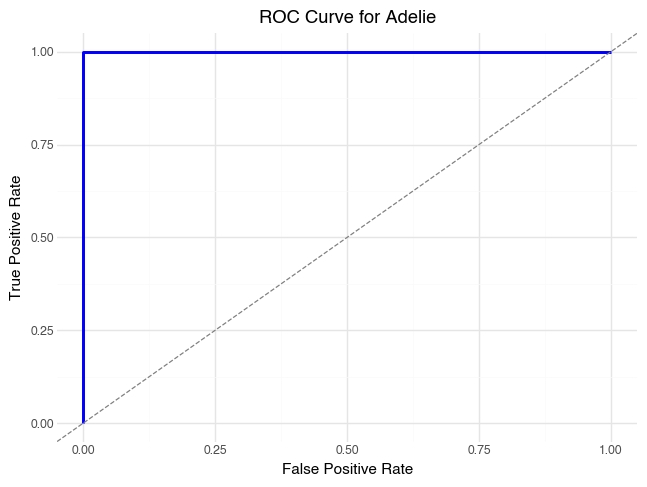

In [22]:
roc_plot = (
    ggplot(roc_df, aes(x="FPR", y="TPR")) +
    geom_line(color="blue", size=1.2) +
    geom_abline(linetype="dashed", color="gray") +
    labs(
        title=f"ROC Curve for Adelie",
        x="False Positive Rate",
        y="True Positive Rate"
    ) +
    theme_minimal()
)

roc_plot


### For model 2, using `n_neighbors=10`

In [23]:
knn_model2 = Pipeline(
    [("preprocessing", ct),
     ("knn",KNeighborsClassifier(n_neighbors=10))]
)

knn_model2

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('dummify',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x16b2cb230>),
                                                 ('standardize',
                                                  StandardScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x14dcc9a90>)])),
                ('knn', KNeighborsClassifier(n_neighbors=10))])

In [24]:
knn_model2.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('dummify',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x16b2cb230>),
                                                 ('standardize',
                                                  StandardScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x14dcc9a90>)])),
                ('knn', KNeighborsClassifier(n_neighbors=10))])

In [25]:
y_pred = knn_model2.predict(X_test)

In [26]:
confusion_matrix(y_test, y_pred)

array([[44,  0,  0],
       [ 0, 20,  0],
       [ 0,  0, 36]])

In [27]:
accuracy_score(y_test, y_pred)

1.0

Displaying Precision, Recall, F1-Score of each species using Classification Report

In [28]:
report_df = pd.DataFrame(classification_report(y_test, y_pred, output_dict = True))
report_df

,Adelie,Chinstrap,Gentoo,accuracy,macro avg,weighted avg
precision,1.0,1.0,1.0,1.0,1.0,1.0
recall,1.0,1.0,1.0,1.0,1.0,1.0
f1-score,1.0,1.0,1.0,1.0,1.0,1.0
support,44.0,20.0,36.0,1.0,100.0,100.0


In [29]:
y_test_bin = label_binarize(y_test, classes=["Adelie", "Chinstrap", "Gentoo"])

In [30]:
y_proba_adelie = knn_model2.predict_proba(X_test)[:, 0]
y_proba_chinstrap = knn_model2.predict_proba(X_test)[:, 1]
y_proba_gentoo = knn_model2.predict_proba(X_test)[:, 2]

In [31]:
# Compute AUC for each species individually
auc_adelie = roc_auc_score(y_test_bin[:, 0], y_proba_adelie)
auc_chinstrap = roc_auc_score(y_test_bin[:, 1], y_proba_chinstrap)
auc_gentoo = roc_auc_score(y_test_bin[:, 2], y_proba_gentoo)
print(auc_adelie, auc_chinstrap, auc_gentoo)

1.0 1.0 1.0


In [32]:
# Compute ROC curve points
fpr, tpr, thresholds = roc_curve(y_test_bin[:, 0], y_proba_adelie)
auc_value = roc_auc_score(y_test_bin[:, 0], y_proba_adelie)

roc_df = pd.DataFrame({
    "FPR": fpr,
    "TPR": tpr
})

roc_df

,FPR,TPR
0,0.000000,0.000000
1,0.000000,0.704545
2,0.000000,0.840909
3,0.000000,0.954545
4,0.000000,1.000000
5,0.107143,1.000000
6,1.000000,1.000000


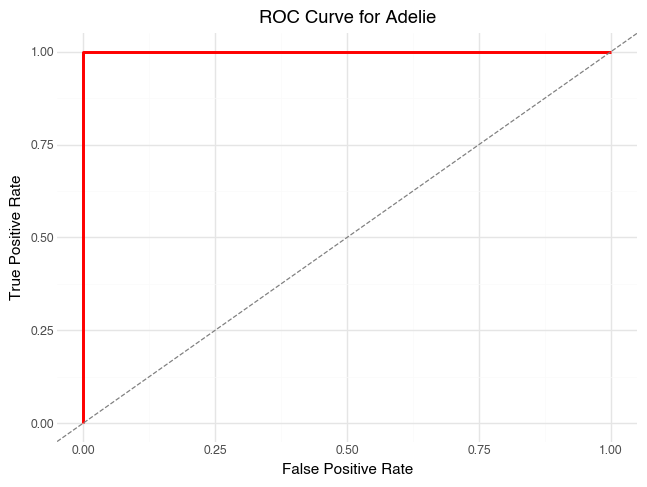

In [33]:
roc_plot = (
    ggplot(roc_df, aes(x="FPR", y="TPR")) +
    geom_line(color="red", size=1.2) +
    geom_abline(linetype="dashed", color="gray") +
    labs(
        title=f"ROC Curve for Adelie",
        x="False Positive Rate",
        y="True Positive Rate"
    ) +
    theme_minimal()
)

roc_plot


## Two Decision Tree models (for different complexities of trees)

### For model 1, using `max_depth=3`

In [34]:
dt_model1 = Pipeline(
    [("preprocessing", ct),
     ("dt", DecisionTreeClassifier(max_depth=3))]
)

dt_model1

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('dummify',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x16b2cb230>),
                                                 ('standardize',
                                                  StandardScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x14dcc9a90>)])),
                ('dt', DecisionTreeClassifier(max_depth=3))])

In [35]:
dt_model1.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('dummify',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x16b2cb230>),
                                                 ('standardize',
                                                  StandardScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x14dcc9a90>)])),
                ('dt', DecisionTreeClassifier(max_depth=3))])

In [36]:
y_pred = dt_model1.predict(X_test)

In [37]:
confusion_matrix(y_test, y_pred)

array([[44,  0,  0],
       [ 0, 20,  0],
       [ 1,  0, 35]])

In [38]:
accuracy_score(y_test, y_pred)

0.99

Displaying Precision, Recall, F1-Score of each species using Classification Report

In [39]:
report_df = pd.DataFrame(classification_report(y_test, y_pred, output_dict = True))
report_df

,Adelie,Chinstrap,Gentoo,accuracy,macro avg,weighted avg
precision,0.977778,1.0,1.000000,0.99,0.992593,0.990222
recall,1.000000,1.0,0.972222,0.99,0.990741,0.990000
f1-score,0.988764,1.0,0.985915,0.99,0.991560,0.989986
support,44.000000,20.0,36.000000,0.99,100.000000,100.000000


In [40]:
y_test_bin = label_binarize(y_test, classes=["Adelie", "Chinstrap", "Gentoo"])

In [41]:
y_proba_adelie = dt_model1.predict_proba(X_test)[:, 0]
y_proba_chinstrap = dt_model1.predict_proba(X_test)[:, 1]
y_proba_gentoo = dt_model1.predict_proba(X_test)[:, 2]

In [42]:
# Compute AUC for each species individually
auc_adelie = roc_auc_score(y_test_bin[:, 0], y_proba_adelie)
auc_chinstrap = roc_auc_score(y_test_bin[:, 1], y_proba_chinstrap)
auc_gentoo = roc_auc_score(y_test_bin[:, 2], y_proba_gentoo)
print(auc_adelie, auc_chinstrap, auc_gentoo)

0.9989853896103897 1.0 0.9997829861111112


In [43]:
# Compute ROC curve points
fpr, tpr, thresholds = roc_curve(y_test_bin[:, 0], y_proba_adelie)
auc_value = roc_auc_score(y_test_bin[:, 0], y_proba_adelie)

roc_df = pd.DataFrame({
    "FPR": fpr,
    "TPR": tpr
})

roc_df

,FPR,TPR
0,0.000000,0.000000
1,0.000000,0.931818
2,0.017857,0.954545
3,0.017857,1.000000
4,0.321429,1.000000
5,1.000000,1.000000


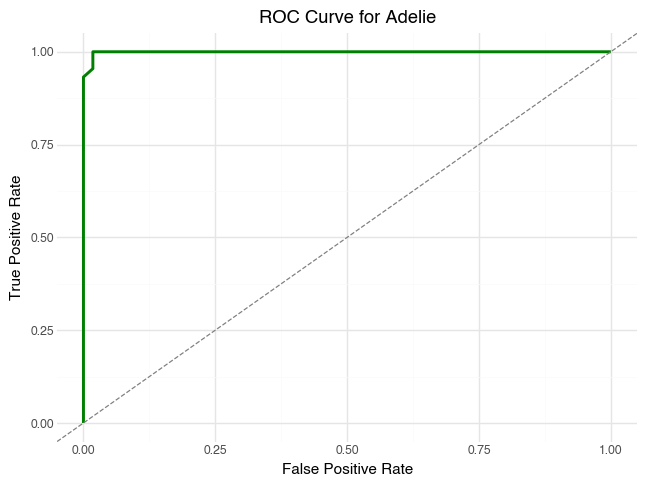

In [44]:
roc_plot = (
    ggplot(roc_df, aes(x="FPR", y="TPR")) +
    geom_line(color="green", size=1.2) +
    geom_abline(linetype="dashed", color="gray") +
    labs(
        title=f"ROC Curve for Adelie",
        x="False Positive Rate",
        y="True Positive Rate"
    ) +
    theme_minimal()
)

roc_plot


### For model 2, using `max_depth=6`

In [45]:
dt_model2 = Pipeline(
    [("preprocessing", ct),
     ("dt", DecisionTreeClassifier(max_depth=6))]
)

dt_model2

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('dummify',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x16b2cb230>),
                                                 ('standardize',
                                                  StandardScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x14dcc9a90>)])),
                ('dt', DecisionTreeClassifier(max_depth=6))])

In [46]:
dt_model2.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('dummify',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x16b2cb230>),
                                                 ('standardize',
                                                  StandardScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x14dcc9a90>)])),
                ('dt', DecisionTreeClassifier(max_depth=6))])

In [47]:
y_pred = dt_model2.predict(X_test)

In [48]:
confusion_matrix(y_test, y_pred)

array([[44,  0,  0],
       [ 3, 17,  0],
       [ 0,  0, 36]])

In [49]:
accuracy_score(y_test, y_pred)

0.97

Displaying Precision, Recall, F1-Score of each species using Classification Report

In [50]:
report_df = pd.DataFrame(classification_report(y_test, y_pred, output_dict = True))
report_df

,Adelie,Chinstrap,Gentoo,accuracy,macro avg,weighted avg
precision,0.936170,1.000000,1.0,0.97,0.978723,0.971915
recall,1.000000,0.850000,1.0,0.97,0.950000,0.970000
f1-score,0.967033,0.918919,1.0,0.97,0.961984,0.969278
support,44.000000,20.000000,36.0,0.97,100.000000,100.000000


In [51]:
y_test_bin = label_binarize(y_test, classes=["Adelie", "Chinstrap", "Gentoo"])

In [52]:
y_proba_adelie = dt_model2.predict_proba(X_test)[:, 0]
y_proba_chinstrap = dt_model2.predict_proba(X_test)[:, 1]
y_proba_gentoo = dt_model2.predict_proba(X_test)[:, 2]

In [53]:
# Compute AUC for each species individually
auc_adelie = roc_auc_score(y_test_bin[:, 0], y_proba_adelie)
auc_chinstrap = roc_auc_score(y_test_bin[:, 1], y_proba_chinstrap)
auc_gentoo = roc_auc_score(y_test_bin[:, 2], y_proba_gentoo)
print(auc_adelie, auc_chinstrap, auc_gentoo)

0.9732142857142857 0.925 1.0


In [54]:
# Compute ROC curve points
fpr, tpr, thresholds = roc_curve(y_test_bin[:, 0], y_proba_adelie)
auc_value = roc_auc_score(y_test_bin[:, 0], y_proba_adelie)

roc_df = pd.DataFrame({
    "FPR": fpr,
    "TPR": tpr
})

roc_df

,FPR,TPR
0,0.000000,0.0
1,0.053571,1.0
2,1.000000,1.0


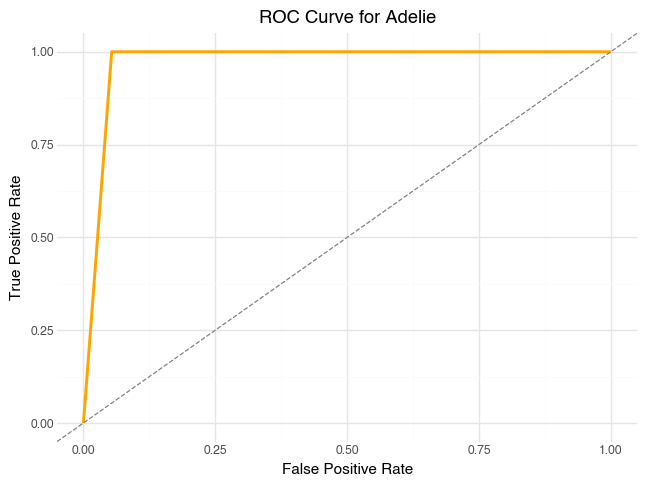

In [55]:
roc_plot = (
    ggplot(roc_df, aes(x="FPR", y="TPR")) +
    geom_line(color="orange", size=1.2) +
    geom_abline(linetype="dashed", color="gray") +
    labs(
        title=f"ROC Curve for Adelie",
        x="False Positive Rate",
        y="True Positive Rate"
    ) +
    theme_minimal()
)

roc_plot